# Урок 3. Разведочный анализ данных в R

In [12]:
install.packages("rafalib")

package 'rafalib' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\viv232\AppData\Local\Temp\RtmpWwlsBT\downloaded_packages


In [13]:
library(rio)
library(dplyr)
library(rafalib)

In [14]:
dat<-import("cardio_train.csv")   # загружаем датасэт в R с помощью import() из пакета rio
head(dat)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
8,21914,1,151,67,120,80,2,2,0,0,0,0


In [15]:
dim(dat)

[1] 70000    13

In [16]:
str(dat)

'data.frame':	70000 obs. of  13 variables:
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ cardio     : int  0 1 1 1 0 0 0 1 0 0 ...


В столбце age возраст представлен в днях, что не привычно. Поэтому, для простоты интерпретации, добавим новый столбец, в котором возраст пациента будет в годах

In [17]:
?mutate

mutate {dplyr},R Documentation
.data,"A tbl. All main verbs are S3 generics and provide methods for tbl_df(), dtplyr::tbl_dt() and dbplyr::tbl_dbi()."
...,"Name-value pairs of expressions, each with length 1 or the same length as the number of rows in the group (if using group_by()) or in the entire input (if not using groups). The name of each argument will be the name of a new variable, and the value will be its corresponding value. Use a NULL value in mutate to drop a variable. New variables overwrite existing variables of the same name. The arguments in ... are automatically quoted and evaluated in the context of the data frame. They support unquoting and splicing. See vignette(""programming"") for an introduction to these concepts."


In [18]:
head(dat$age/365)

[1] 50.39178 55.41918 51.66301 48.28219 47.87397 60.03836

In [19]:
head(trunc(dat$age/365))    # отсекает дробную часть

[1] 50 55 51 48 47 60

In [20]:
dat<-dat %>% mutate(age_years=(trunc(age/365))) # ф-ция  trunc() отсекает дробную часть
#добавили столбец "age_years"
head(dat)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62,110,80,1,1,0,0,1,0,50
1,20228,1,156,85,140,90,3,1,0,0,1,1,55
2,18857,1,165,64,130,70,3,1,0,0,0,1,51
3,17623,2,169,82,150,100,1,1,0,0,1,1,48
4,17474,1,156,56,100,60,1,1,0,0,0,0,47
8,21914,1,151,67,120,80,2,2,0,0,0,0,60


В этом датасэте будем исследовать две переменные из  набора «Cardiovascular Disease»: нижние и верхнее давление пациента. Мы имеем 70 000 измерений для каждой величины и ожидаем увидеть, что они следуют нормальному распределению

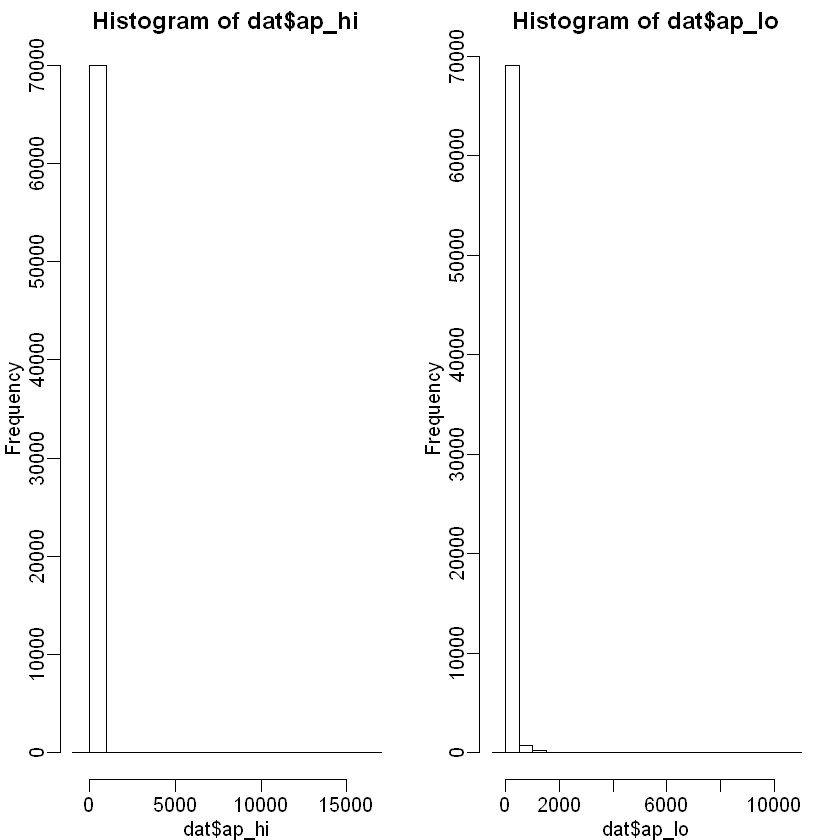

In [21]:
mypar(1,2)
hist(dat$ap_hi)
hist(dat$ap_lo)

__График показал нам то, чего мы не ожидали увидеть!__

Warning message in log(dat$ap_hi):
"созданы NaN"Warning message in log(dat$ap_lo):
"созданы NaN"

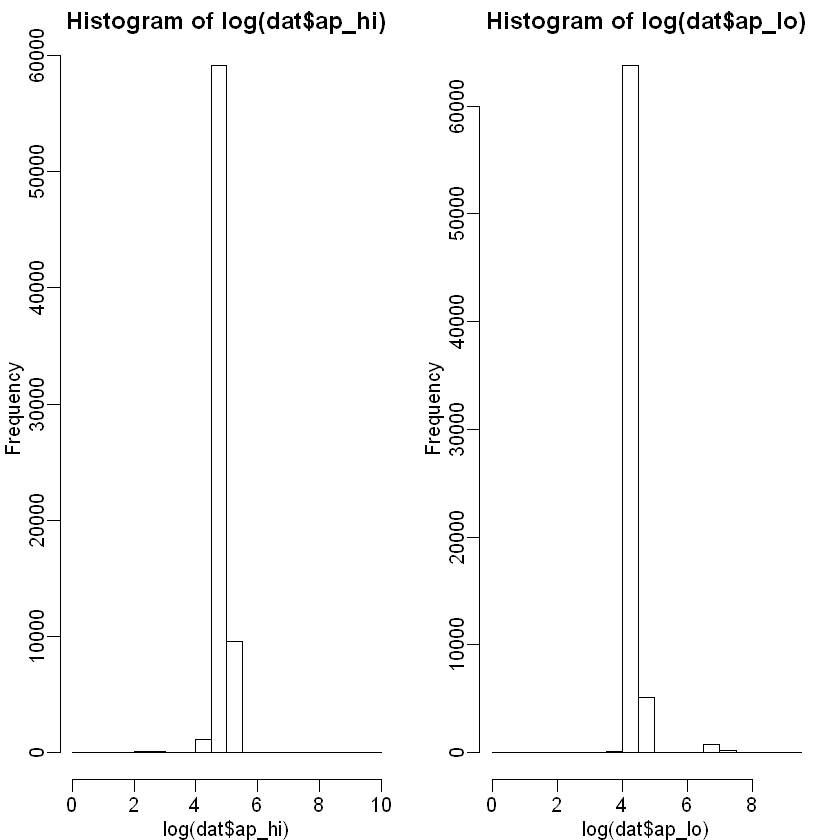

In [27]:
mypar(1,2)
hist(log(dat$ap_hi))
hist(log(dat$ap_lo))

Также представление о наших данных могут дать нам седнее арифметическое и стандартное отклонение. Особенно ценны эти метрики были бы,если бы распределение следовало нормальному, что не соблюдается.

In [22]:
mean(dat$ap_hi)

[1] 128.8173

In [23]:
sd(dat$ap_hi)

[1] 154.0114

In [24]:
mean(dat$ap_lo)

[1] 96.63041

In [25]:
sd(dat$ap_lo)

[1] 188.4725

__Мы наблюдаем большое стандартное отклонение, следовательно, и большую дисперсию__

## boxplot

boxplot является одним из самых эффективных методов представления данных. Он позволяет взглянуть на все значения случайной величины. Значения выстраиваются по возростанию и находятся их квартили.

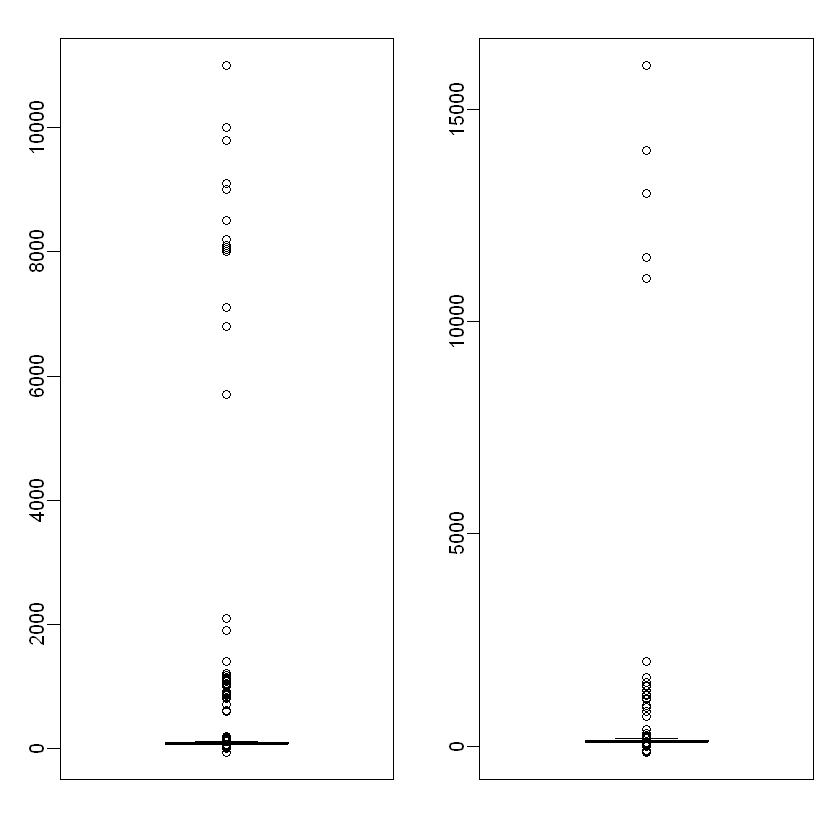

In [29]:
mypar(1,2)
box_lo<-boxplot(dat$ap_lo)
box_hi<-boxplot(dat$ap_hi) # видим выбросы, которые влияют на sd и mean

__Необходимо принять решение о том, что делать с выбросами__

Построим боксплоты без учета выбросов,которые явно были ошибкой ввода

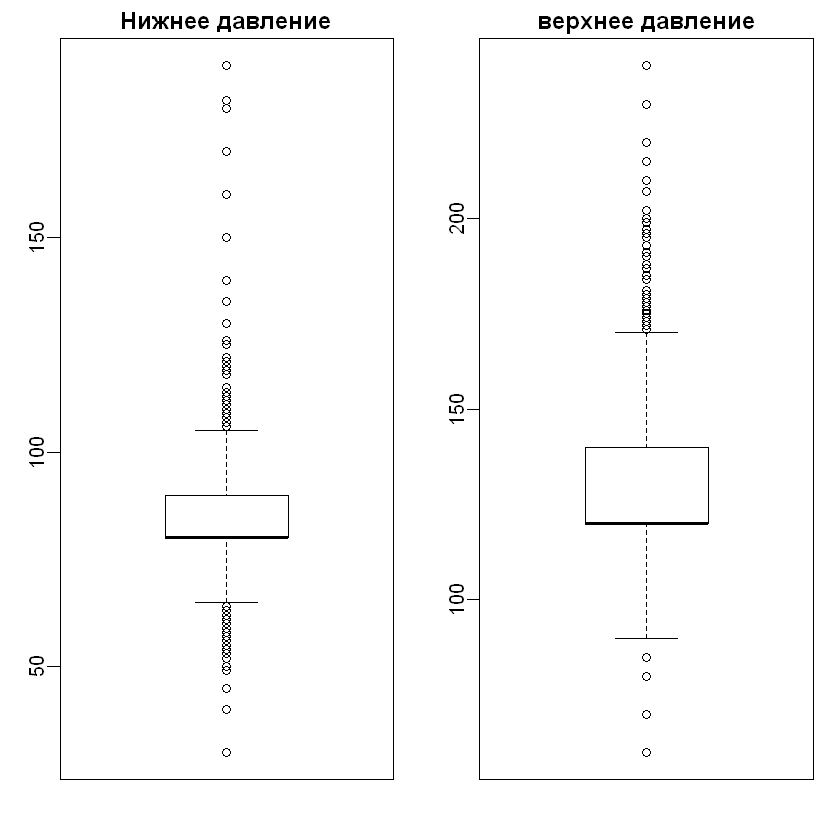

In [31]:
mypar(1,2)
box_lo<-boxplot(dat$ap_lo[dat$ap_lo<200 & dat$ap_lo>20])
title("Нижнее давление")
box_hi<-boxplot(dat$ap_hi[dat$ap_hi<300 & dat$ap_hi>40])
title("верхнее давление")

In [32]:
min(dat$ap_hi[dat$ap_hi<300&dat$ap_hi>40])

[1] 60

In [33]:
min(dat$ap_hi)

[1] -150

Можно и более глубокое исследование по выбросам провести, например, у нас были данные с отрицательным знаком, которые просто не вошли в наш интервал

In [34]:
dat$ap_hi[dat$ap_hi<0]

[1] -100 -115 -100 -140 -120 -150 -120

Научимся понимать информацию, которую несет боксплот. Как строится, какие границы и что означают

In [35]:
median(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20])

[1] 80

In [36]:
quantile(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20], 0.25)

25% 
 80

### получаем квартиль

In [39]:
head(sort(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20]))

[1] 30 30 30 30 30 30

In [40]:
length(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20])

[1] 68994

In [41]:
68994*25/100

[1] 17248.5

In [42]:
ind_p25<-trunc(68994*25/100)+1
ind_p25

[1] 17249

In [43]:
sort(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20])[ind_p25]

[1] 80

Разберемся, почему 1-й квартиль совпадает с медианой

In [44]:
68994/2

[1] 34497

In [45]:
sort(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20])[c(34497,34498)]

[1] 80 80

In [46]:
head(sort(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20])[17249:34498])

[1] 80 80 80 80 80 80

In [47]:
head(sort(dat$ap_lo[dat$ap_lo<200&dat$ap_lo>20])[17249:34497], 20)

[1] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80

Воспользуемся функцией  filter(), %>%  из пакета dplyr, чтобы подготовить датасэт без грубейших ошибок ввода

In [50]:
tidy_set <- dat %>% filter((ap_lo<200 & ap_lo>20) & (ap_hi<300 & ap_hi>40))
head(tidy_set)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62,110,80,1,1,0,0,1,0,50
1,20228,1,156,85,140,90,3,1,0,0,1,1,55
2,18857,1,165,64,130,70,3,1,0,0,0,1,51
3,17623,2,169,82,150,100,1,1,0,0,1,1,48
4,17474,1,156,56,100,60,1,1,0,0,0,0,47
8,21914,1,151,67,120,80,2,2,0,0,0,0,60


Сравним число значений переменных в 1-м и новом датасэте

In [51]:
dim(dat)

[1] 70000    14

In [52]:
dim(tidy_set)

[1] 68781    14

In [55]:
nrow(tidy_set)

[1] 68781

In [56]:
ncol(tidy_set)

[1] 14

#### Сравним старые и новые стандартные отклонения и средние арифметические

__Верхнее давление:__

In [58]:
mean(dat$ap_hi)

[1] 128.8173

In [57]:
mean(tidy_set$ap_hi)

[1] 126.6153

In [59]:
sd(dat$ap_hi)

[1] 154.0114

In [60]:
sd(tidy_set$ap_hi)

[1] 16.76354

__Нижнее давление:__

In [62]:
mean(dat$ap_lo)

[1] 96.63041

In [63]:
mean(tidy_set$ap_lo)

[1] 81.37756

In [64]:
sd(dat$ap_lo)

[1] 188.4725

In [65]:
sd(tidy_set$ap_lo)

[1] 9.688359

После небольшой обработки данных взглянем на данные с помощью гистограммы

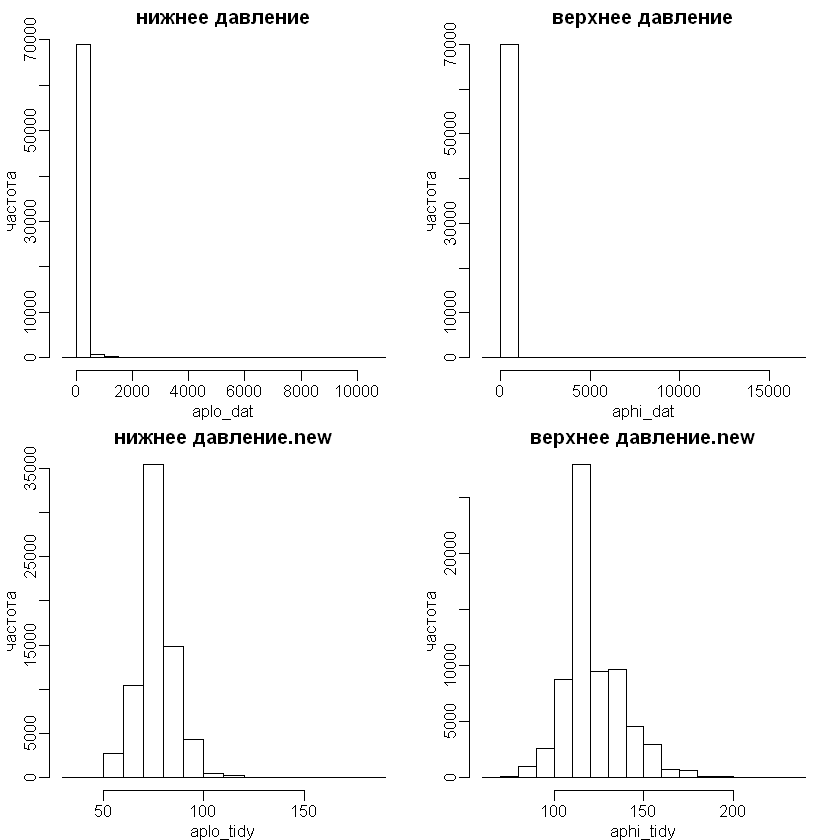

In [68]:
mypar(2,2)

hist(dat$ap_lo, main="нижнее давление", xlab = "aplo_dat", ylab="частота")
hist(dat$ap_hi, main="верхнее давление", xlab = "aphi_dat", ylab="частота")

hist(tidy_set$ap_lo, main="нижнее давление.new", xlab = "aplo_tidy", ylab="частота")
hist(tidy_set$ap_hi, main="верхнее давление.new", xlab = "aphi_tidy", ylab="частота")

## QQ-plot

QQ-график позволяет проверить данные на нормальность. В основе лежит идея сравнить теоретические квантили с квантилями случайной величины

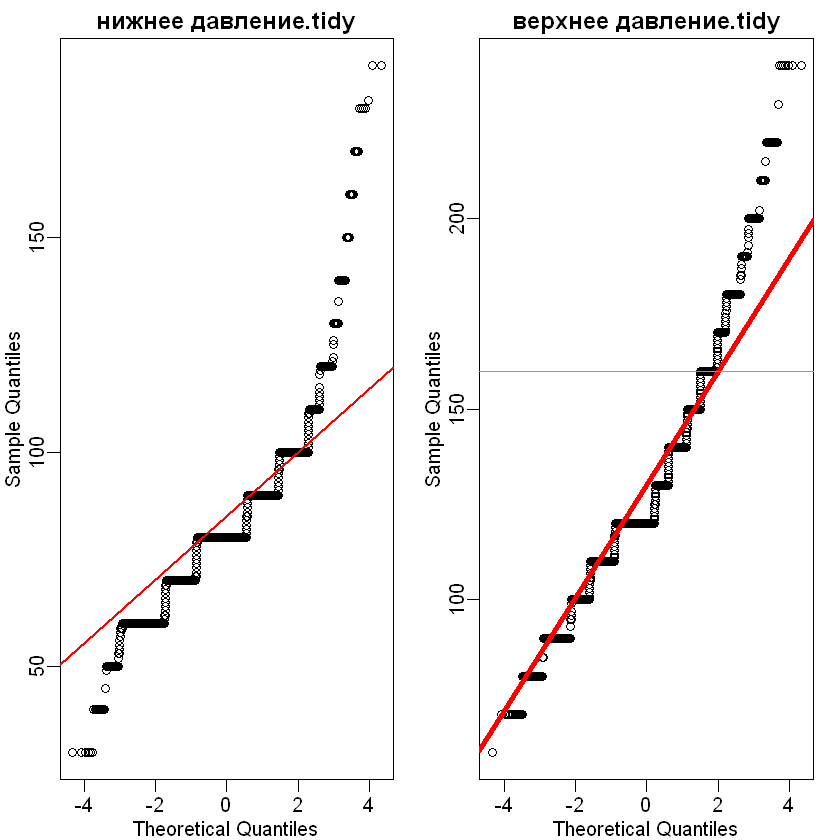

In [70]:
mypar(1,2)
qqnorm(tidy_set$ap_lo, main="нижнее давление.tidy")
qqline(tidy_set$ap_lo, col="red", lwd=2)

qqnorm(tidy_set$ap_hi, main="верхнее давление.tidy")
qqline(tidy_set$ap_hi, col="red", lwd=4)
abline(h=160, col="green")

__Вывод: верхние и нижние значения лежат слишком высоко и низко соответственно,чем предполагалось нормальным распределением__

Сравним верхнее и нижнее давление по полу

In [71]:
head(tidy_set)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62,110,80,1,1,0,0,1,0,50
1,20228,1,156,85,140,90,3,1,0,0,1,1,55
2,18857,1,165,64,130,70,3,1,0,0,0,1,51
3,17623,2,169,82,150,100,1,1,0,0,1,1,48
4,17474,1,156,56,100,60,1,1,0,0,0,0,47
8,21914,1,151,67,120,80,2,2,0,0,0,0,60


List of 2
 $ 1: int [1:44795] 90 70 60 80 80 70 60 80 70 70 ...
 $ 2: int [1:23986] 80 100 90 80 80 90 80 70 80 60 ...
List of 2
 $ 1: int [1:44795] 140 130 100 120 130 110 110 120 110 130 ...
 $ 2: int [1:23986] 110 150 130 120 120 130 120 120 120 110 ...


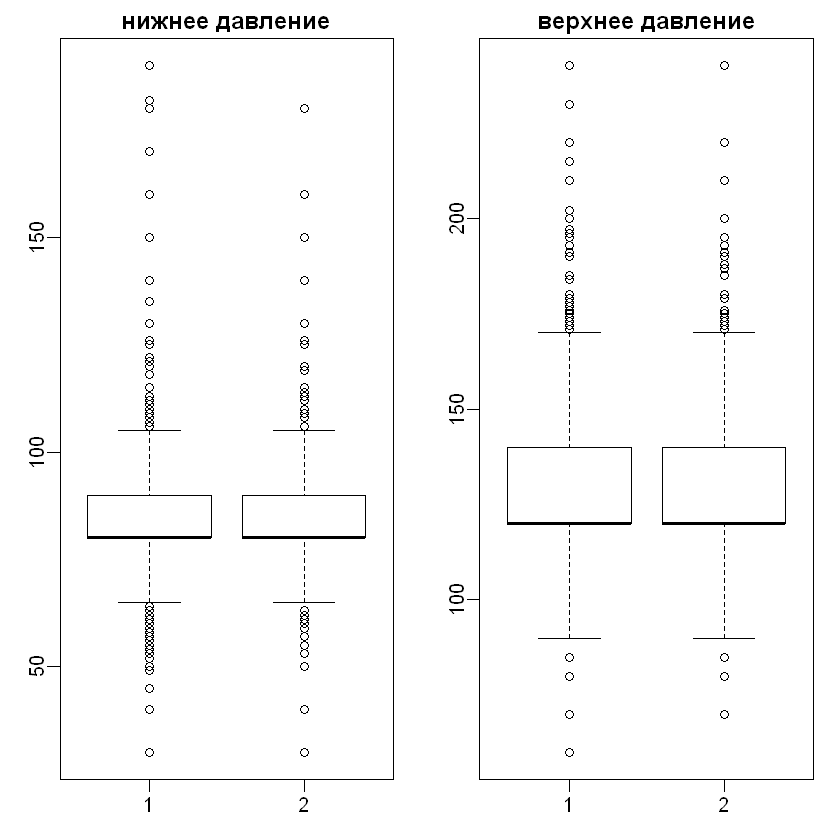

In [72]:
mypar(1,2)
groupss_lo<-split(tidy_set$ap_lo,tidy_set$gender)
str(groupss_lo)
boxplot(groupss_lo)
title("нижнее давление")

groupss_hi<-split(tidy_set$ap_hi,tidy_set$gender)
str(groupss_hi)
boxplot(groupss_hi)
title("верхнее давление")

Вернемся к исследованию величин "верхнее давление" и "нижнее давление" без учета пола пациента

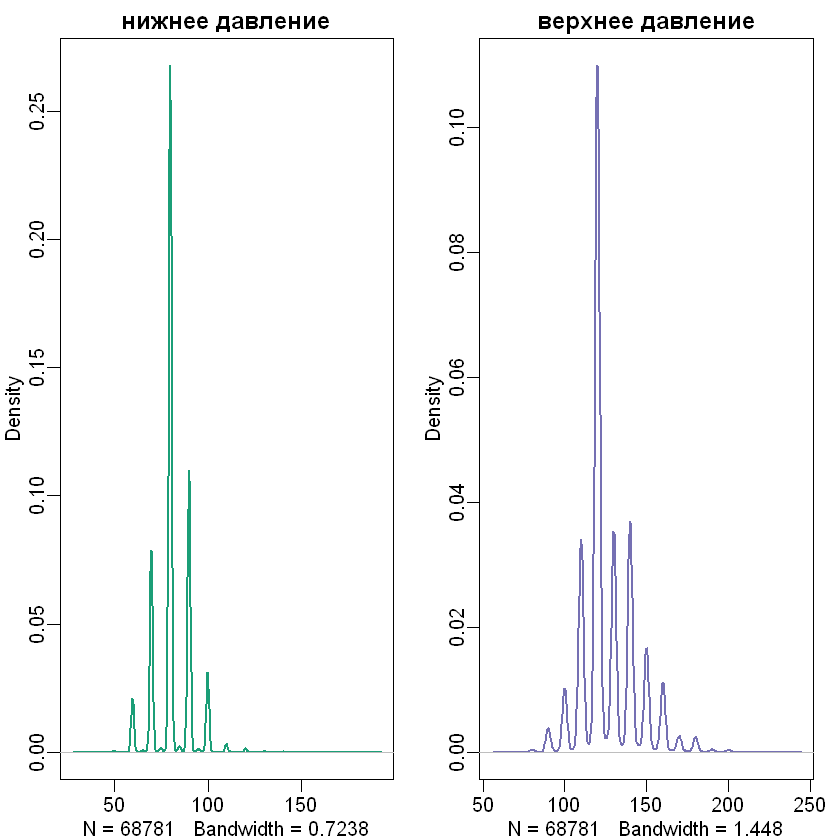

In [73]:
mypar(1,2)
plot(density(tidy_set$ap_lo), col=1, lwd=2, main="нижнее давление")
plot(density(tidy_set$ap_hi), col=3, lwd=2, main="верхнее давление")

Разберемся в причинах пиков

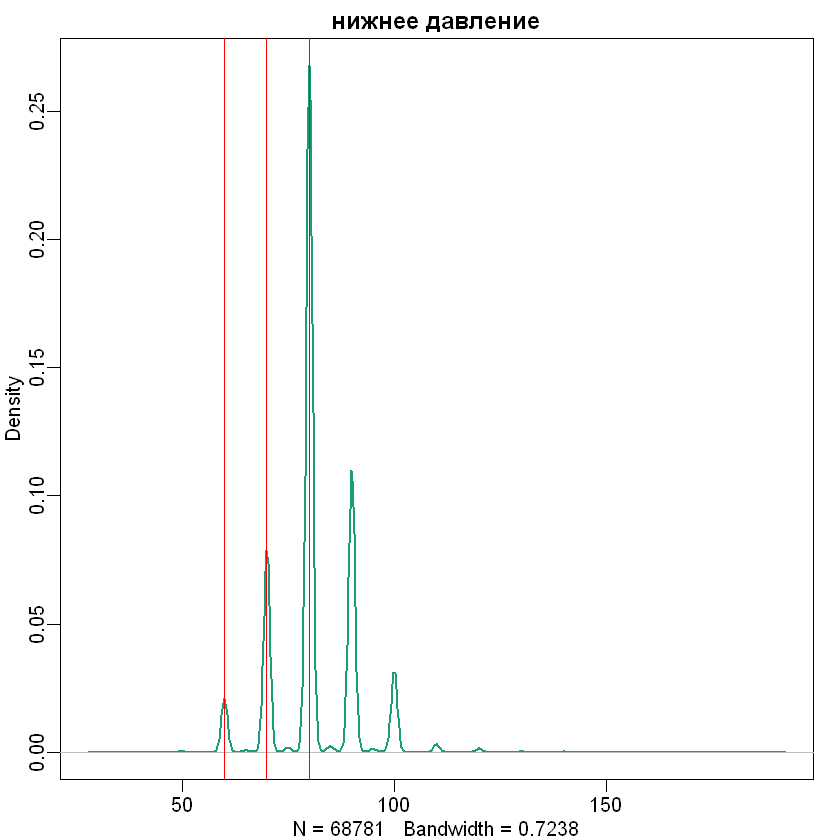

In [74]:
mypar(1,1)
plot(density(tidy_set$ap_lo), col="1", lwd=2, main="нижнее давление")
abline(v=70,col="red")
abline(v=60,col="red")
abline(v=80,col="red")

In [76]:
sort_lo<-sort(tidy_set$ap_lo)
cut_1<-sort_lo[sort_lo>65&sort_lo<75]
tail(cut_1,20)

[1] 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74

#### Как изобразить нормальное распределение?

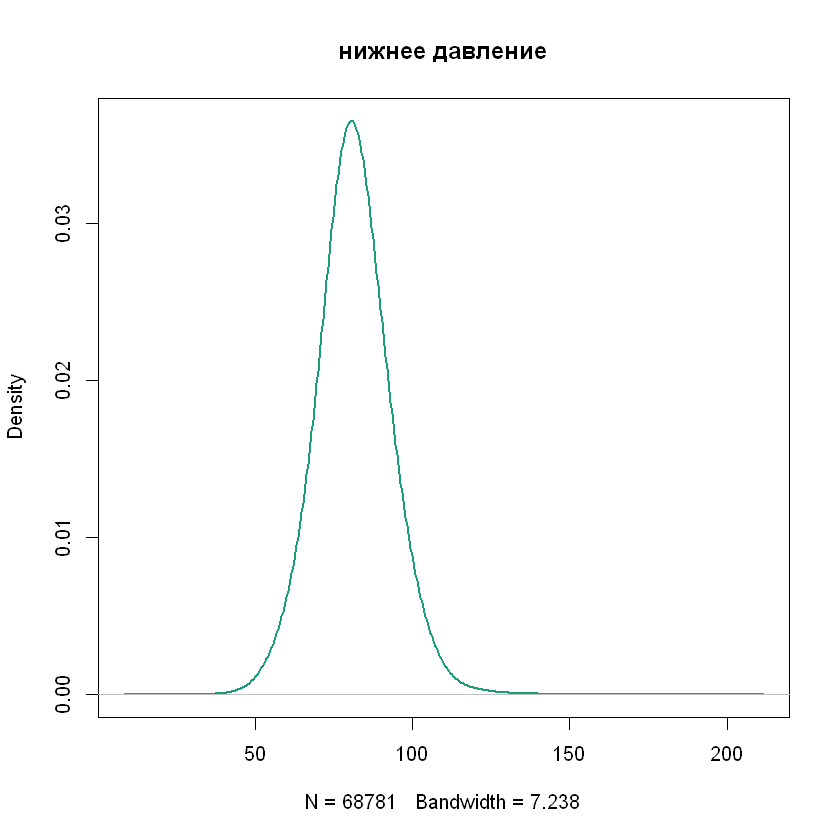

In [77]:
plot(density(tidy_set$ap_lo, adjust = 10), col=1, lwd=2, main="нижнее давление")

два графика на одном

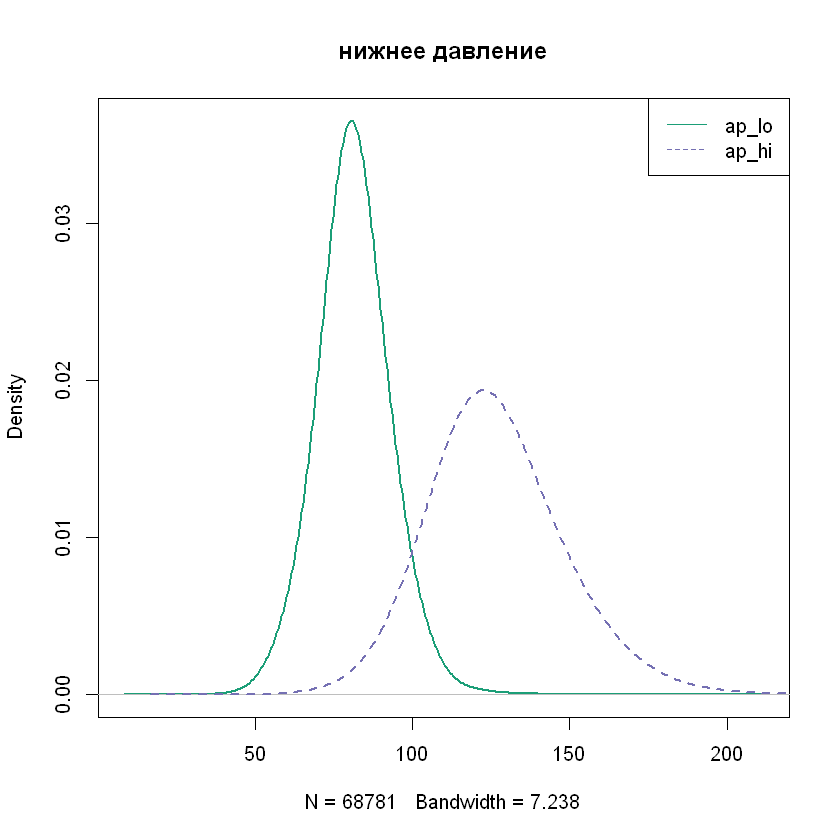

In [83]:
plot(density(tidy_set$ap_lo, adjust = 10),col=1, lwd=2, main="нижнее давление")
lines(density(tidy_set$ap_hi,adjust = 10),col=3, lwd=2, lty=2)
legend("topright",c("ap_lo","ap_hi"), col=c(1,3), lty = c(1,2))

## скаттерплот

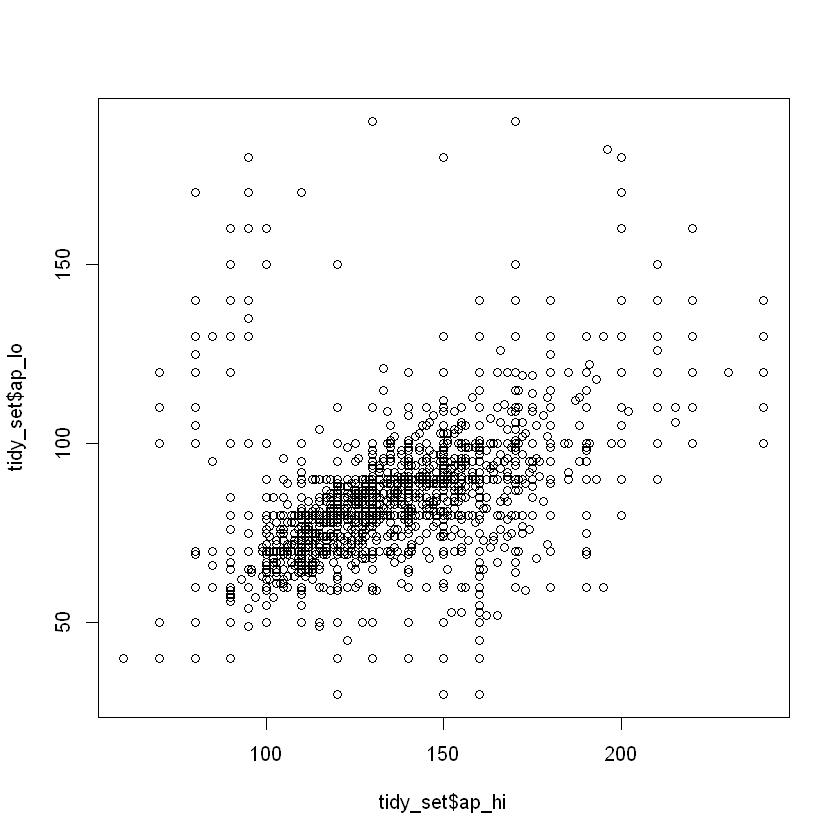

In [84]:
plot(tidy_set$ap_hi, tidy_set$ap_lo)

покажем разделение на группы

In [97]:
?points

points {graphics},R Documentation
"x, y",coordinate vectors of points to plot.
type,character indicating the type of plotting; actually any of the types as in plot.default.
...,Further graphical parameters may also be supplied as arguments. See ‘Details’.


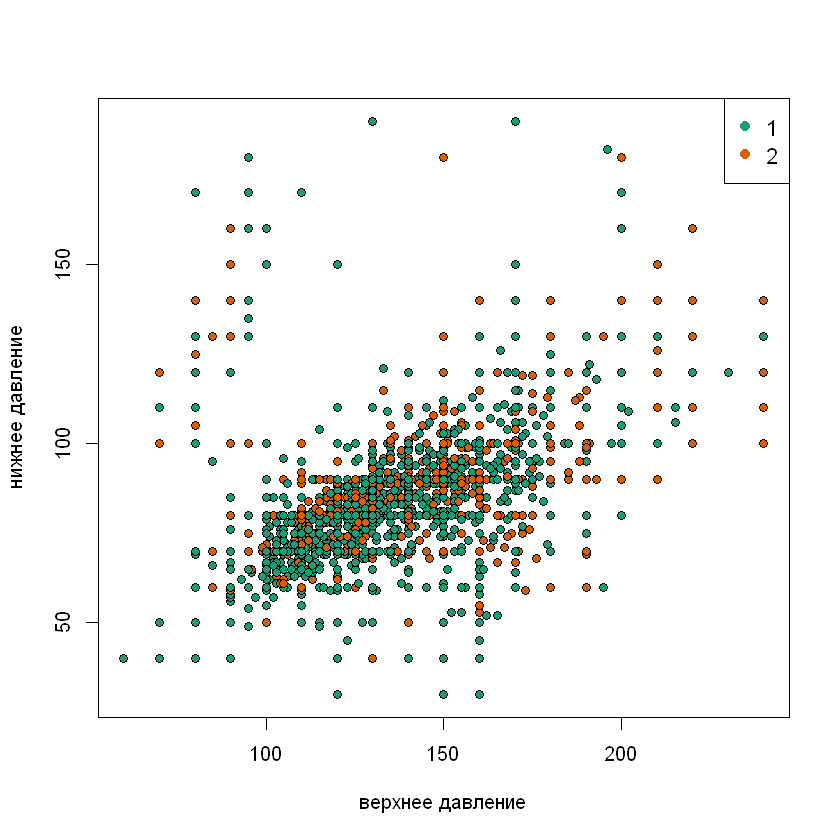

In [85]:
plot(tidy_set$ap_hi,tidy_set$ap_lo, pch=21,
     bg= as.numeric(factor(tidy_set$gender)), xlab = "верхнее давление", ylab = "нижнее давление")
legend("topright", levels(factor(tidy_set$gender)),col=seq(along=levels(factor(tidy_set$gender))), pch=19,cex=1.1)

фомулируем вывод

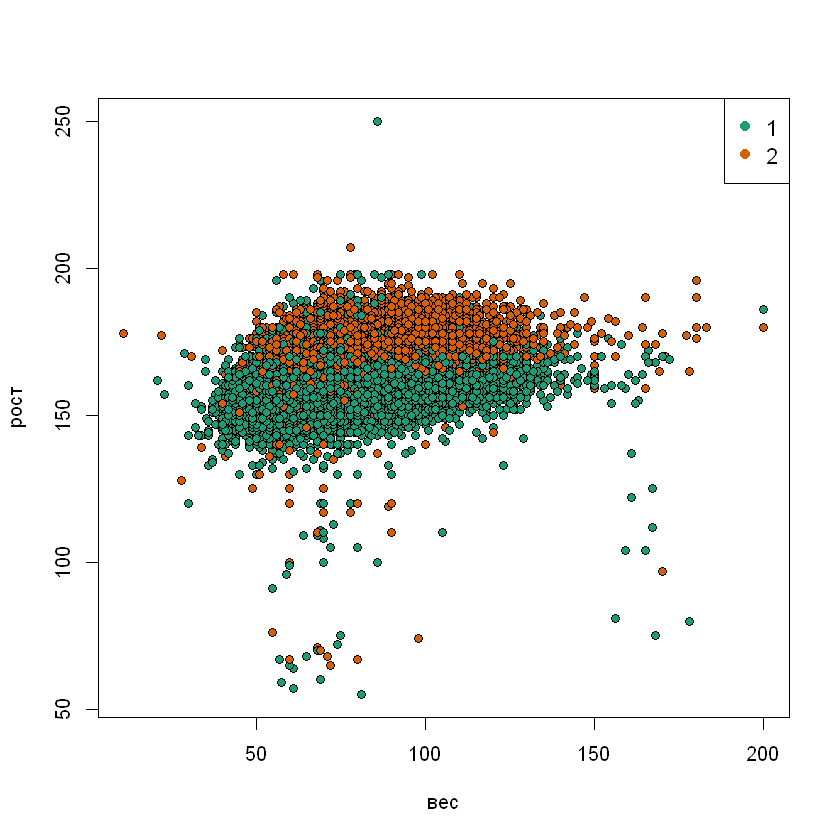

In [87]:
plot(tidy_set$weight,tidy_set$height, pch=21,
     bg= as.numeric(factor(tidy_set$gender)), xlab = "вес", ylab= "рост")
legend("topright", levels(factor(tidy_set$gender)),col=seq(along=levels(factor(tidy_set$gender))), pch=19,cex=1.1)

In [89]:
miniset<-tidy_set[,3:5]
head(miniset)

gender,height,weight
2,168,62
1,156,85
1,165,64
2,169,82
1,156,56
1,151,67


In [90]:
nrow(miniset)

[1] 68781

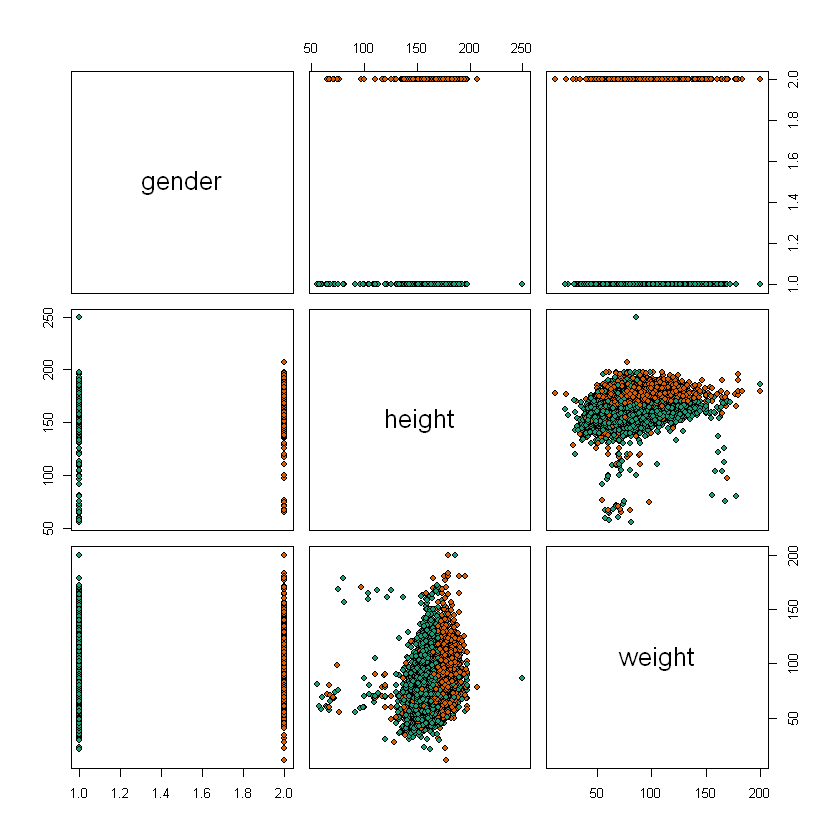

In [91]:
plot(miniset, pch=21, bg=miniset$gender)

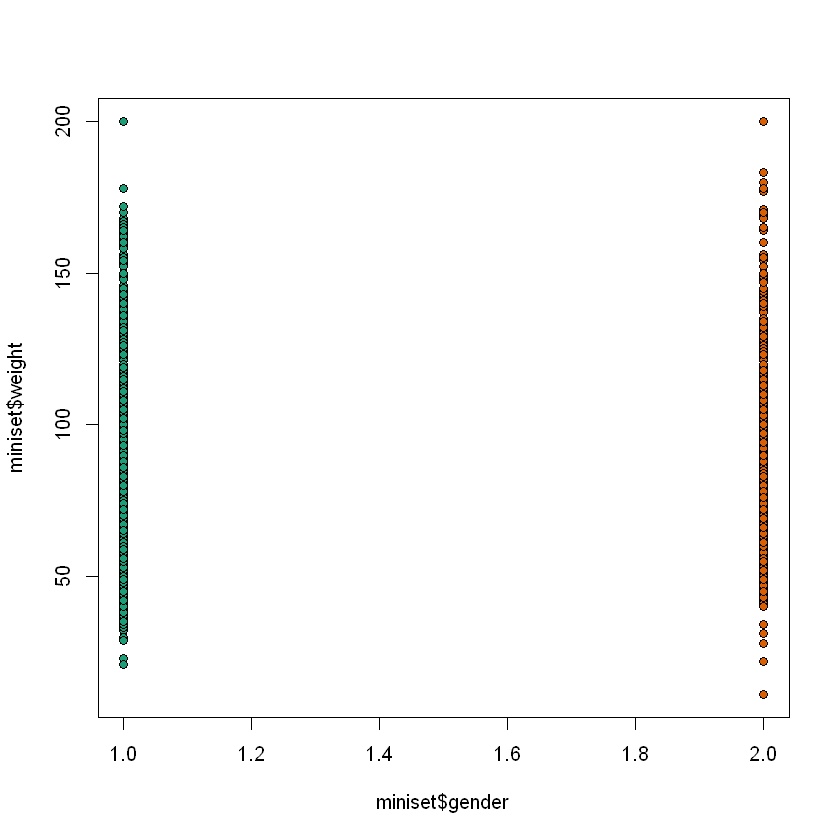

In [92]:
plot(miniset$gender,miniset$weight, pch=21, bg=miniset$gender)

In [93]:
colnames(tidy_set)

[1] "id"          "age"         "gender"      "height"      "weight"     
 [6] "ap_hi"       "ap_lo"       "cholesterol" "gluc"        "smoke"      
[11] "alco"        "active"      "cardio"      "age_years"

In [94]:
mini_set1<-tidy_set[,c(3,6,7)]
head(mini_set1)

gender,ap_hi,ap_lo
2,110,80
1,140,90
1,130,70
2,150,100
1,100,60
1,120,80


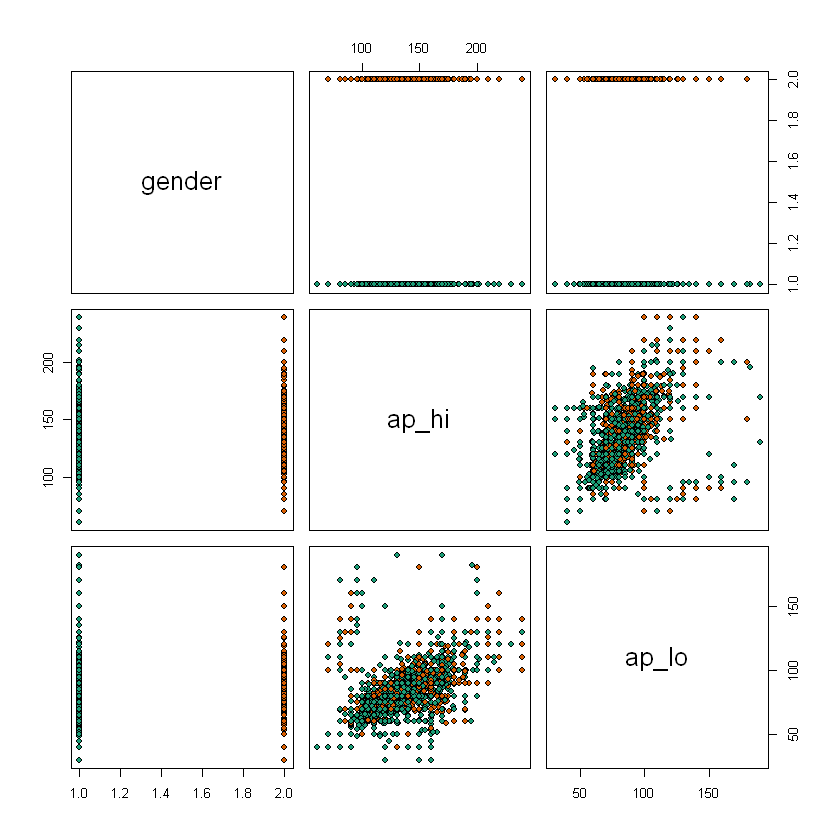

In [95]:
plot(mini_set1,pch=21, bg=miniset$gender)

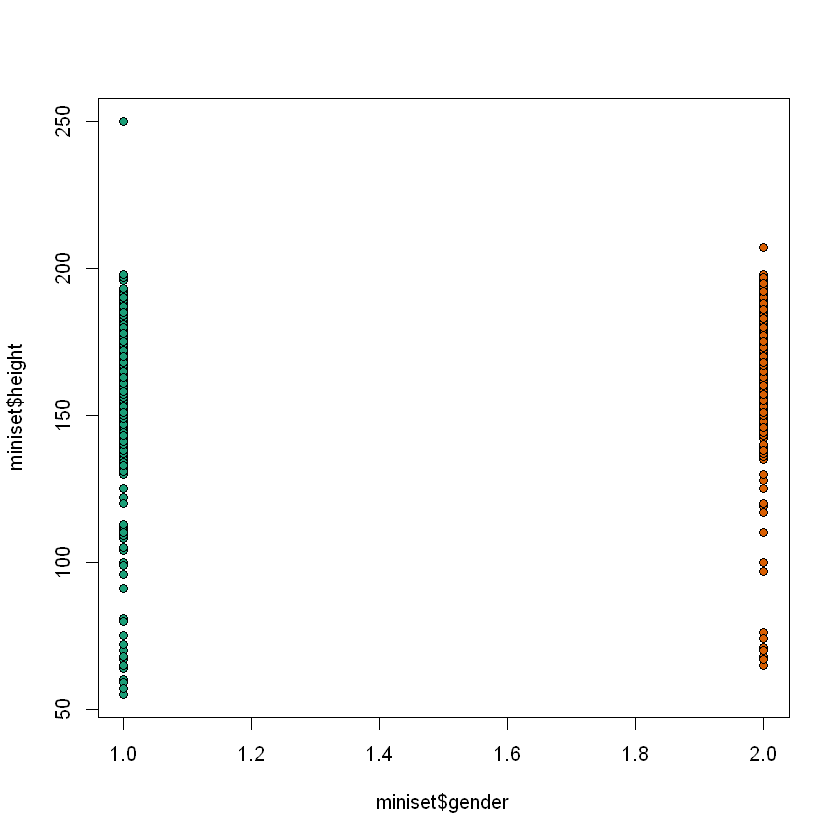

In [96]:
plot(miniset$gender, miniset$height, pch=21, bg=miniset$gender)